In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
from PIL import Image
import seaborn as sns

In [2]:
elon1 = pd.read_csv(r'../data/elon/ElonTweets(Sentiment).csv')

In [3]:
elon1.head()

,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment
0,0,0,2022-09-29 20:22:46+00:00,1575581872913907712,@MuskUniversity True,elonmusk,NaN,377,127,3007,en,Twitter for iPhone,107414837,122,True,2022-09-29,MuskUniversity,"['neutral', 0.6005306]"
1,1,1,2022-09-29 15:35:09+00:00,1575509494510993408,Needs be able to get from Starbase to South Pa...,elonmusk,NaN,1604,1416,33556,en,Twitter for iPhone,107414837,122,True,2022-09-29,_,"['neutral', 0.8452575]"
2,2,2,2022-09-29 15:32:42+00:00,1575508878300618752,@WholeMarsBlog Off-label use 🤣,elonmusk,NaN,754,492,23482,en,Twitter for iPhone,107414837,122,True,2022-09-29,WholeMarsBlog,"['neutral', 0.7530303]"
3,3,3,2022-09-29 15:31:12+00:00,1575508498430820352,Cybertruck will be waterproof enough to serve ...,elonmusk,NaN,12870,9732,124276,en,Twitter for iPhone,107414837,122,True,2022-09-29,_,"['positive', 0.6118259]"
4,4,4,2022-09-29 15:28:10+00:00,1575507735298207744,@phibetakitten Submarines use electric motors ...,elonmusk,NaN,509,347,8189,en,Twitter for iPhone,107414837,122,True,2022-09-29,phibetakitten,"['neutral', 0.85970926]"


In [4]:
elon2 = pd.read_csv(r'../data/elon/ElonTweets(Sentiment) 10-28-22.csv')

In [5]:
elon2.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment
0,0,0,0,2022-10-28 03:49:11+00:00,1585841080431321088,the bird is freed,elonmusk,Twitter HQ,57663,128631,730472,en,Twitter for iPhone,110553384,122,True,2022-10-28,_,"['positive', 0.70848316]"
1,1,1,1,2022-10-28 01:50:49+00:00,1585811291851018241,Falcon rockets to orbit as seen from LA https:...,elonmusk,Twitter HQ,6857,16499,189436,en,Twitter for iPhone,110553384,122,True,2022-10-28,_,"['neutral', 0.90077394]"
2,2,2,2,2022-10-27 21:45:47+00:00,1585749627365515266,@Gfilche @Twitter 🤣,elonmusk,Twitter HQ,632,246,7052,und,Twitter for iPhone,110553384,122,True,2022-10-27,"Gfilche,Twitter","['neutral', 0.5714027]"
3,3,3,3,2022-10-27 16:17:39+00:00,1585667048020901888,@PeterSchiff 🤣 thanks,elonmusk,Twitter HQ,670,420,17577,en,Twitter for iPhone,110553384,122,True,2022-10-27,PeterSchiff,"['positive', 0.78971434]"
4,4,4,4,2022-10-27 13:19:25+00:00,1585622194696044544,@ZubyMusic Absolutely,elonmusk,Twitter HQ,1281,1152,42896,en,Twitter for iPhone,110553384,122,True,2022-10-27,ZubyMusic,"['neutral', 0.5287457]"


In [6]:
elon3 = pd.read_csv(r'../data/elon/ElonTweets(Sentiment)_11-9-22.csv')

In [7]:
elon3.head()

,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment
0,0,0,2022-11-10 01:38:32+00:00,1590519242805641216,"@micsolana In days to come, we’ll add granular...",elonmusk,NaN,348,133,1557,en,Twitter for iPhone,115241851,130,True,2022-11-10,micsolana,"['neutral', 0.7305445]"
1,1,1,2022-11-10 00:45:30+00:00,1590505894210834434,@micsolana We are changing the text to say “Le...,elonmusk,NaN,1224,598,9464,en,Twitter for iPhone,115241851,130,True,2022-11-10,micsolana,"['neutral', 0.58761513]"
2,2,2,2022-11-09 23:14:53+00:00,1590483090367197185,@guslabu @tomwarren 🎯😎💰,elonmusk,NaN,496,122,2066,und,Twitter for iPhone,115241851,130,True,2022-11-09,"guslabu,tomwarren","['positive', 0.5533905]"
3,3,3,2022-11-09 23:04:29+00:00,1590480472613998593,@StarringShane Subscription Blue is better tha...,elonmusk,NaN,2253,1041,17872,en,Twitter for iPhone,115241851,130,True,2022-11-09,StarringShane,"['positive', 0.47260958]"
4,4,4,2022-11-09 19:29:02+00:00,1590426255018848256,@PPathole The goal of Twitter DMs is to supers...,elonmusk,NaN,1001,513,10904,en,Twitter for iPhone,115241851,130,True,2022-11-09,PPathole,"['neutral', 0.82402253]"


In [11]:
elon = pd.concat([elon1, elon2, elon3], ignore_index=True)

In [12]:
elon.head()

,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment,Unnamed: 0.2
0,0,0,2022-09-29 20:22:46+00:00,1575581872913907712,@MuskUniversity True,elonmusk,NaN,377,127,3007,en,Twitter for iPhone,107414837,122,True,2022-09-29,MuskUniversity,"['neutral', 0.6005306]",NaN
1,1,1,2022-09-29 15:35:09+00:00,1575509494510993408,Needs be able to get from Starbase to South Pa...,elonmusk,NaN,1604,1416,33556,en,Twitter for iPhone,107414837,122,True,2022-09-29,_,"['neutral', 0.8452575]",NaN
2,2,2,2022-09-29 15:32:42+00:00,1575508878300618752,@WholeMarsBlog Off-label use 🤣,elonmusk,NaN,754,492,23482,en,Twitter for iPhone,107414837,122,True,2022-09-29,WholeMarsBlog,"['neutral', 0.7530303]",NaN
3,3,3,2022-09-29 15:31:12+00:00,1575508498430820352,Cybertruck will be waterproof enough to serve ...,elonmusk,NaN,12870,9732,124276,en,Twitter for iPhone,107414837,122,True,2022-09-29,_,"['positive', 0.6118259]",NaN
4,4,4,2022-09-29 15:28:10+00:00,1575507735298207744,@phibetakitten Submarines use electric motors ...,elonmusk,NaN,509,347,8189,en,Twitter for iPhone,107414837,122,True,2022-09-29,phibetakitten,"['neutral', 0.85970926]",NaN


In [14]:
elon.sort_values('Datetime', ascending=False)

,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment,Unnamed: 0.2
35047,0,0,2022-11-10 01:38:32+00:00,1590519242805641216,"@micsolana In days to come, we’ll add granular...",elonmusk,NaN,348,133,1557,en,Twitter for iPhone,115241851,130,True,2022-11-10,micsolana,"['neutral', 0.7305445]",NaN
35048,1,1,2022-11-10 00:45:30+00:00,1590505894210834434,@micsolana We are changing the text to say “Le...,elonmusk,NaN,1224,598,9464,en,Twitter for iPhone,115241851,130,True,2022-11-10,micsolana,"['neutral', 0.58761513]",NaN
35049,2,2,2022-11-09 23:14:53+00:00,1590483090367197185,@guslabu @tomwarren 🎯😎💰,elonmusk,NaN,496,122,2066,und,Twitter for iPhone,115241851,130,True,2022-11-09,"guslabu,tomwarren","['positive', 0.5533905]",NaN
35050,3,3,2022-11-09 23:04:29+00:00,1590480472613998593,@StarringShane Subscription Blue is better tha...,elonmusk,NaN,2253,1041,17872,en,Twitter for iPhone,115241851,130,True,2022-11-09,StarringShane,"['positive', 0.47260958]",NaN
35051,4,4,2022-11-09 19:29:02+00:00,1590426255018848256,@PPathole The goal of Twitter DMs is to supers...,elonmusk,NaN,1001,513,10904,en,Twitter for iPhone,115241851,130,True,2022-11-09,PPathole,"['neutral', 0.82402253]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35045,17443,17443,2011-12-01 09:55:11+00:00,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,Twitter HQ,33,22,188,en,Twitter Web Client,110555351,122,True,2011-12-01,_,"['positive', 0.9733198]",17443.0
52764,17717,17717,2011-12-01 09:55:11+00:00,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,NaN,33,22,189,en,Twitter Web Client,115242467,130,True,2011-12-01,_,"['positive', 0.9733198]",NaN
17601,17601,17601,2010-06-04 18:31:57+00:00,15434727182,"Please ignore prior tweets, as that was someon...",elonmusk,NaN,967,559,6030,en,Twitter Web Client,107415714,122,True,2010-06-04,_,"['neutral', 0.5472165]",NaN
35046,17444,17444,2010-06-04 18:31:57+00:00,15434727182,"Please ignore prior tweets, as that was someon...",elonmusk,Twitter HQ,988,558,6023,en,Twitter Web Client,110555351,122,True,2010-06-04,_,"['neutral', 0.5472165]",17444.0


In [31]:
# del elon['Unnamed: 0']
# del elon['Unnamed: 0.1']
# del elon['Unnamed: 0.2']
# del elon['verified']

In [32]:
elon

,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,Date,mentions,sentiment
0,2022-09-29 20:22:46+00:00,1575581872913907712,@MuskUniversity True,elonmusk,NaN,377,127,3007,en,Twitter for iPhone,107414837,122,2022-09-29,MuskUniversity,"['neutral', 0.6005306]"
1,2022-09-29 15:35:09+00:00,1575509494510993408,Needs be able to get from Starbase to South Pa...,elonmusk,NaN,1604,1416,33556,en,Twitter for iPhone,107414837,122,2022-09-29,_,"['neutral', 0.8452575]"
2,2022-09-29 15:32:42+00:00,1575508878300618752,@WholeMarsBlog Off-label use 🤣,elonmusk,NaN,754,492,23482,en,Twitter for iPhone,107414837,122,2022-09-29,WholeMarsBlog,"['neutral', 0.7530303]"
3,2022-09-29 15:31:12+00:00,1575508498430820352,Cybertruck will be waterproof enough to serve ...,elonmusk,NaN,12870,9732,124276,en,Twitter for iPhone,107414837,122,2022-09-29,_,"['positive', 0.6118259]"
4,2022-09-29 15:28:10+00:00,1575507735298207744,@phibetakitten Submarines use electric motors ...,elonmusk,NaN,509,347,8189,en,Twitter for iPhone,107414837,122,2022-09-29,phibetakitten,"['neutral', 0.85970926]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52761,2011-12-03 08:22:07+00:00,142881284019060736,That was a total non sequitur btw,elonmusk,NaN,28,9,52,en,Twitter for iPhone,115242467,130,2011-12-03,_,"['negative', 0.5067324]"
52762,2011-12-03 08:20:28+00:00,142880871391838208,"Great Voltaire quote, arguably better than Twa...",elonmusk,NaN,32,30,66,en,Twitter for iPhone,115242467,130,2011-12-03,_,"['positive', 0.55860823]"
52763,2011-12-01 10:29:04+00:00,142188458125963264,I made the volume on the Model S http://t.co/w...,elonmusk,NaN,29,13,76,en,Twitter Web Client,115242467,130,2011-12-01,_,"['neutral', 0.6384011]"
52764,2011-12-01 09:55:11+00:00,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,NaN,33,22,189,en,Twitter Web Client,115242467,130,2011-12-01,_,"['positive', 0.9733198]"


In [37]:
elon.loc[elon['Tweet Id'] == 142179928203460608].iloc[0]['Text']

"Went to Iceland on Sat to ride bumper cars on ice!  No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT"

In [42]:
elon.drop_duplicates(subset='Tweet Id', inplace=True)

In [45]:
elon.loc[elon['Tweet Id'] == 142179928203460608]

,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,Date,mentions,sentiment
17600,2011-12-01 09:55:11+00:00,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,NaN,33,22,189,en,Twitter Web Client,107415714,122,2011-12-01,_,"['positive', 0.9733198]"


In [104]:
text = " ".join(t for t in elon.Text)
text = re.sub(r'http\S+', '', text)
text = re.sub(r'amp\S+', '', text)
text = re.sub(r'@\S+', '', text)

In [105]:
stopwords = set(STOPWORDS)
word_cloud = WordCloud(collocations = False, stopwords=stopwords, background_color = 'white').generate(text)


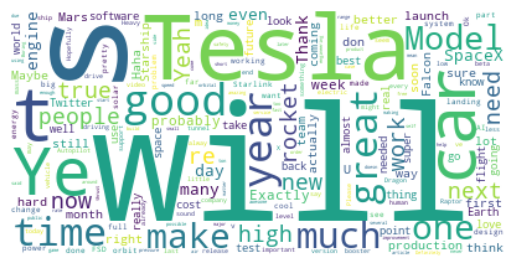

In [106]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

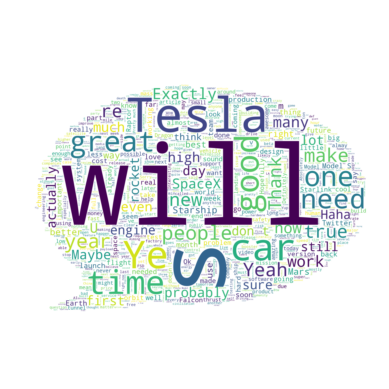

In [112]:
mask = np.array(Image.open("./text_bubble.png"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(text)
# create twitter image
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
# plt.savefig("wordcloud.png", format="png")
plt.show()

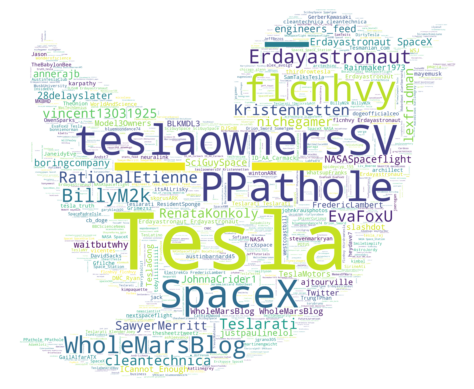

In [113]:
mask = np.array(Image.open("./twitter_logo.png"))
mentions = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(" ".join(elon['mentions']))
# create twitter image
plt.figure()
plt.imshow(mentions, interpolation="bilinear")
plt.axis("off")
# store to file
# plt.savefig("wordcloud.png", format="png")
plt.show()

In [108]:
elon['pos_neg_neu'] = elon[['sentiment']].applymap(lambda str: str.split(",")[0])

In [109]:
elon[['pos_neg_neu']] = elon[['pos_neg_neu']].applymap(lambda str: str.replace("'", ""))
elon[['pos_neg_neu']] = elon[['pos_neg_neu']].applymap(lambda str: str.replace("[", ""))

In [110]:
elon.head()

,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,Date,mentions,sentiment,pos_neg_neu
0,2022-09-29 20:22:46+00:00,1575581872913907712,@MuskUniversity True,elonmusk,NaN,377,127,3007,en,Twitter for iPhone,107414837,122,2022-09-29,MuskUniversity,"['neutral', 0.6005306]",neutral
1,2022-09-29 15:35:09+00:00,1575509494510993408,Needs be able to get from Starbase to South Pa...,elonmusk,NaN,1604,1416,33556,en,Twitter for iPhone,107414837,122,2022-09-29,_,"['neutral', 0.8452575]",neutral
2,2022-09-29 15:32:42+00:00,1575508878300618752,@WholeMarsBlog Off-label use 🤣,elonmusk,NaN,754,492,23482,en,Twitter for iPhone,107414837,122,2022-09-29,WholeMarsBlog,"['neutral', 0.7530303]",neutral
3,2022-09-29 15:31:12+00:00,1575508498430820352,Cybertruck will be waterproof enough to serve ...,elonmusk,NaN,12870,9732,124276,en,Twitter for iPhone,107414837,122,2022-09-29,_,"['positive', 0.6118259]",positive
4,2022-09-29 15:28:10+00:00,1575507735298207744,@phibetakitten Submarines use electric motors ...,elonmusk,NaN,509,347,8189,en,Twitter for iPhone,107414837,122,2022-09-29,phibetakitten,"['neutral', 0.85970926]",neutral


In [123]:
elon[['pos_neg_neu']].value_counts()

pos_neg_neu
neutral        10714
positive        5459
negative        2162
dtype: int64

In [145]:
sentiment = elon.pivot_table(index='pos_neg_neu', aggfunc='count')[['sentiment']]
sentiment.reset_index(inplace=True)
sentiment

,pos_neg_neu,sentiment
0,negative,2162
1,neutral,10714
2,positive,5459


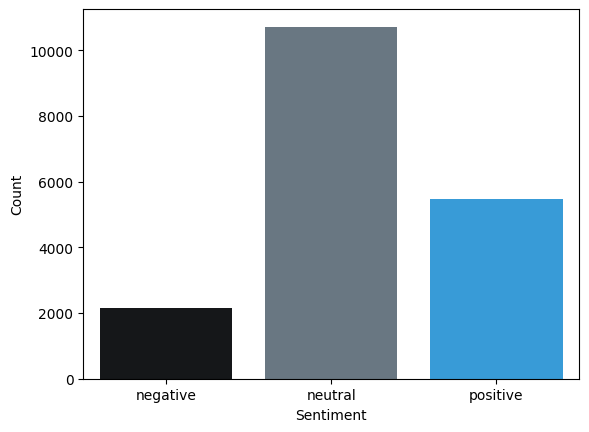

In [165]:
colors = ["#14171A", "#657786", "#1DA1F2"]
sns.set_palette(sns.color_palette(colors))
sns.barplot(sentiment, y='sentiment', x='pos_neg_neu')
plt.xlabel("Sentiment")
plt.ylabel("Count");